# 2.4: Evaluating Hyperparameters - Part 1.

## Table of Contents

#### 1. Importing libraries and data
#### 2. Data Wrangling
#### 3. Data reshaping
#### 4. Data Splitting
#### 5. Hyperparameter Optimization - Grid Search, Random search, 
#### 6. Running Random Forest with Optimized Search Parameter
#### 7. Uncovering Feature Importance
#### 8. Hyperparameter Optimization - Random Search, Running Random Forest with Optimized Search Parameters, 

## 1. Importing libraries and data

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [32]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [35]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [38]:
# defining the path
path = r'C:/users/localadmin/Machine Learning 1'

In [41]:
#Import pleasant weather data as plweather
plweather = pd.read_csv(os.path.join(path, 'Data Sets','Original data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [51]:
plweather.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [53]:
plweather.shape

(22950, 16)

In [65]:
# Importing cleaned data
df = pd.read_csv(os.path.join(path, 'Data Sets','Processed Data/cleaned_DF.csv'), index_col = False)

In [67]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0              6.5             0.8            10.9                     1   
1              6.1             3.3            10.1                     6   
2              8.5             5.1             9.9                     6   
3              6.3             3.8            10.6                     8   
4              3.0            -0.7             6.0                     8   

   BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0               0.81             1.0195                       0.88   
1               0.84             1.0172                       0.25   
2               0.77             1.0179                       0.67   
3               0.93             1.0268                       0.25   
4               0.99             1.0286                       0.25   

   BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                    0.00                7.0                 3.7   
1                    0.00                0.0                 2.9   
2                    0.00                3.5                 3.1   
3                    0.00                0.0                 2.0   
4                    0.06                0.0                 2.0   

   BELGRADE_temp_min  BELGRADE_temp_max  BUDAPEST_cloud_cover  \
0               -0.9                7.9                     4   
1                2.2                4.4                     4   
2               -0.5                6.4                     4   
3               -2.0                3.0                     4   
4                0.7                2.8                     4   

   BUDAPEST_humidity  BUDAPEST_pressure  BUDAPEST_global_radiation  \
0               0.67              1.017                       0.44   
1               0.67              1.017                       0.18   
2               0.67              1.017                       0.30   
3               0.67              1.017                       0.19   
4               0.67              1.017                       0.19   

   BUDAPEST_precipitation  BUDAPEST_sunshine  BUDAPEST_temp_mean  \
0                    0.01                2.3                 2.4   
1                    0.31                0.0                 2.3   
2                    0.00                0.6                 2.7   
3                    0.00                0.0                 2.0   
4                    0.00                0.0                 2.5   

   BUDAPEST_temp_min  BUDAPEST_temp_max  DEBILT_cloud_cover  DEBILT_humidity  \
0               -0.4                5.1                   7             0.85   
1                1.4                3.1                   8             0.90   
2                1.7                5.3                   6             0.92   
3                0.4                4.4                   8             0.95   
4                1.1                5.3                   6             0.90   

   DEBILT_pressure  DEBILT_global_radiation  DEBILT_precipitation  \
0           1.0032                     0.07                  0.25   
1           1.0056                     0.14 

In [69]:
df.shape

(22950, 137)

## 2. Data Wrangling/Transformation

In [71]:
# Reduce observations dataset to 2010's

dfdecade = df[df['DATE'].astype(str).str.startswith('201')] 
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [78]:
# Reduce pleasant weather dataset to 2010's
pl_decade = plweather[plweather['DATE'].astype(str).str.startswith('201')]
pl_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [82]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [86]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [89]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [92]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
BASEL: 32868 entries
DEBILT: 32868 entries
MUNCHENB: 32868 entries
BELGRADE: 32868 entries
DUSSELDORF: 32868 entries
LJUBLJANA: 32868 entries
MADRID: 32868 entries
BUDAPEST: 32868 entries
OSLO: 32868 entries
KASSEL: 32868 entries
MAASTRICHT: 32868 entries
SONNBLICK: 32868 entries
VALENTIA: 32868 entries
HEATHROW: 32868 entries
STOCKHOLM: 32868 entries


All station have 32868 observations

In [96]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [99]:
dfdecade.shape 

(3652, 135)

In [104]:
pl_decade.drop(columns = 'DATE', inplace = True)

In [107]:
pl_decade.shape

(3652, 15)

## 3. Data Reshaping

In [112]:
X = dfdecade

In [115]:
y = pl_decade

In [118]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [121]:
X.shape

(3652, 135)

In [125]:
y.shape

(3652, 15)

## 4. Data Splitting

In [131]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [134]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 5. Hyperparameter Optimization

#### Grid search

In [143]:
# Create a RF classifier

clf = RandomForestClassifier()

In [146]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [149]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 42.555632833639784 minutes


In [157]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6443957648776926


#### Random Search

In [167]:
# Define random search cv

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [171]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [174]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 4.9690202633539835 minutes


In [178]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6443957648776926
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 50, 'max_features': 58, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 175}
Best RANDOM search score is: 0.6389193136181088


## 6. Running Random Forest with Optimized Search Parameters

In [187]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=None, max_features=58, min_samples_leaf=2, min_samples_split=4)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=58, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=150)

In [191]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6582694414019715


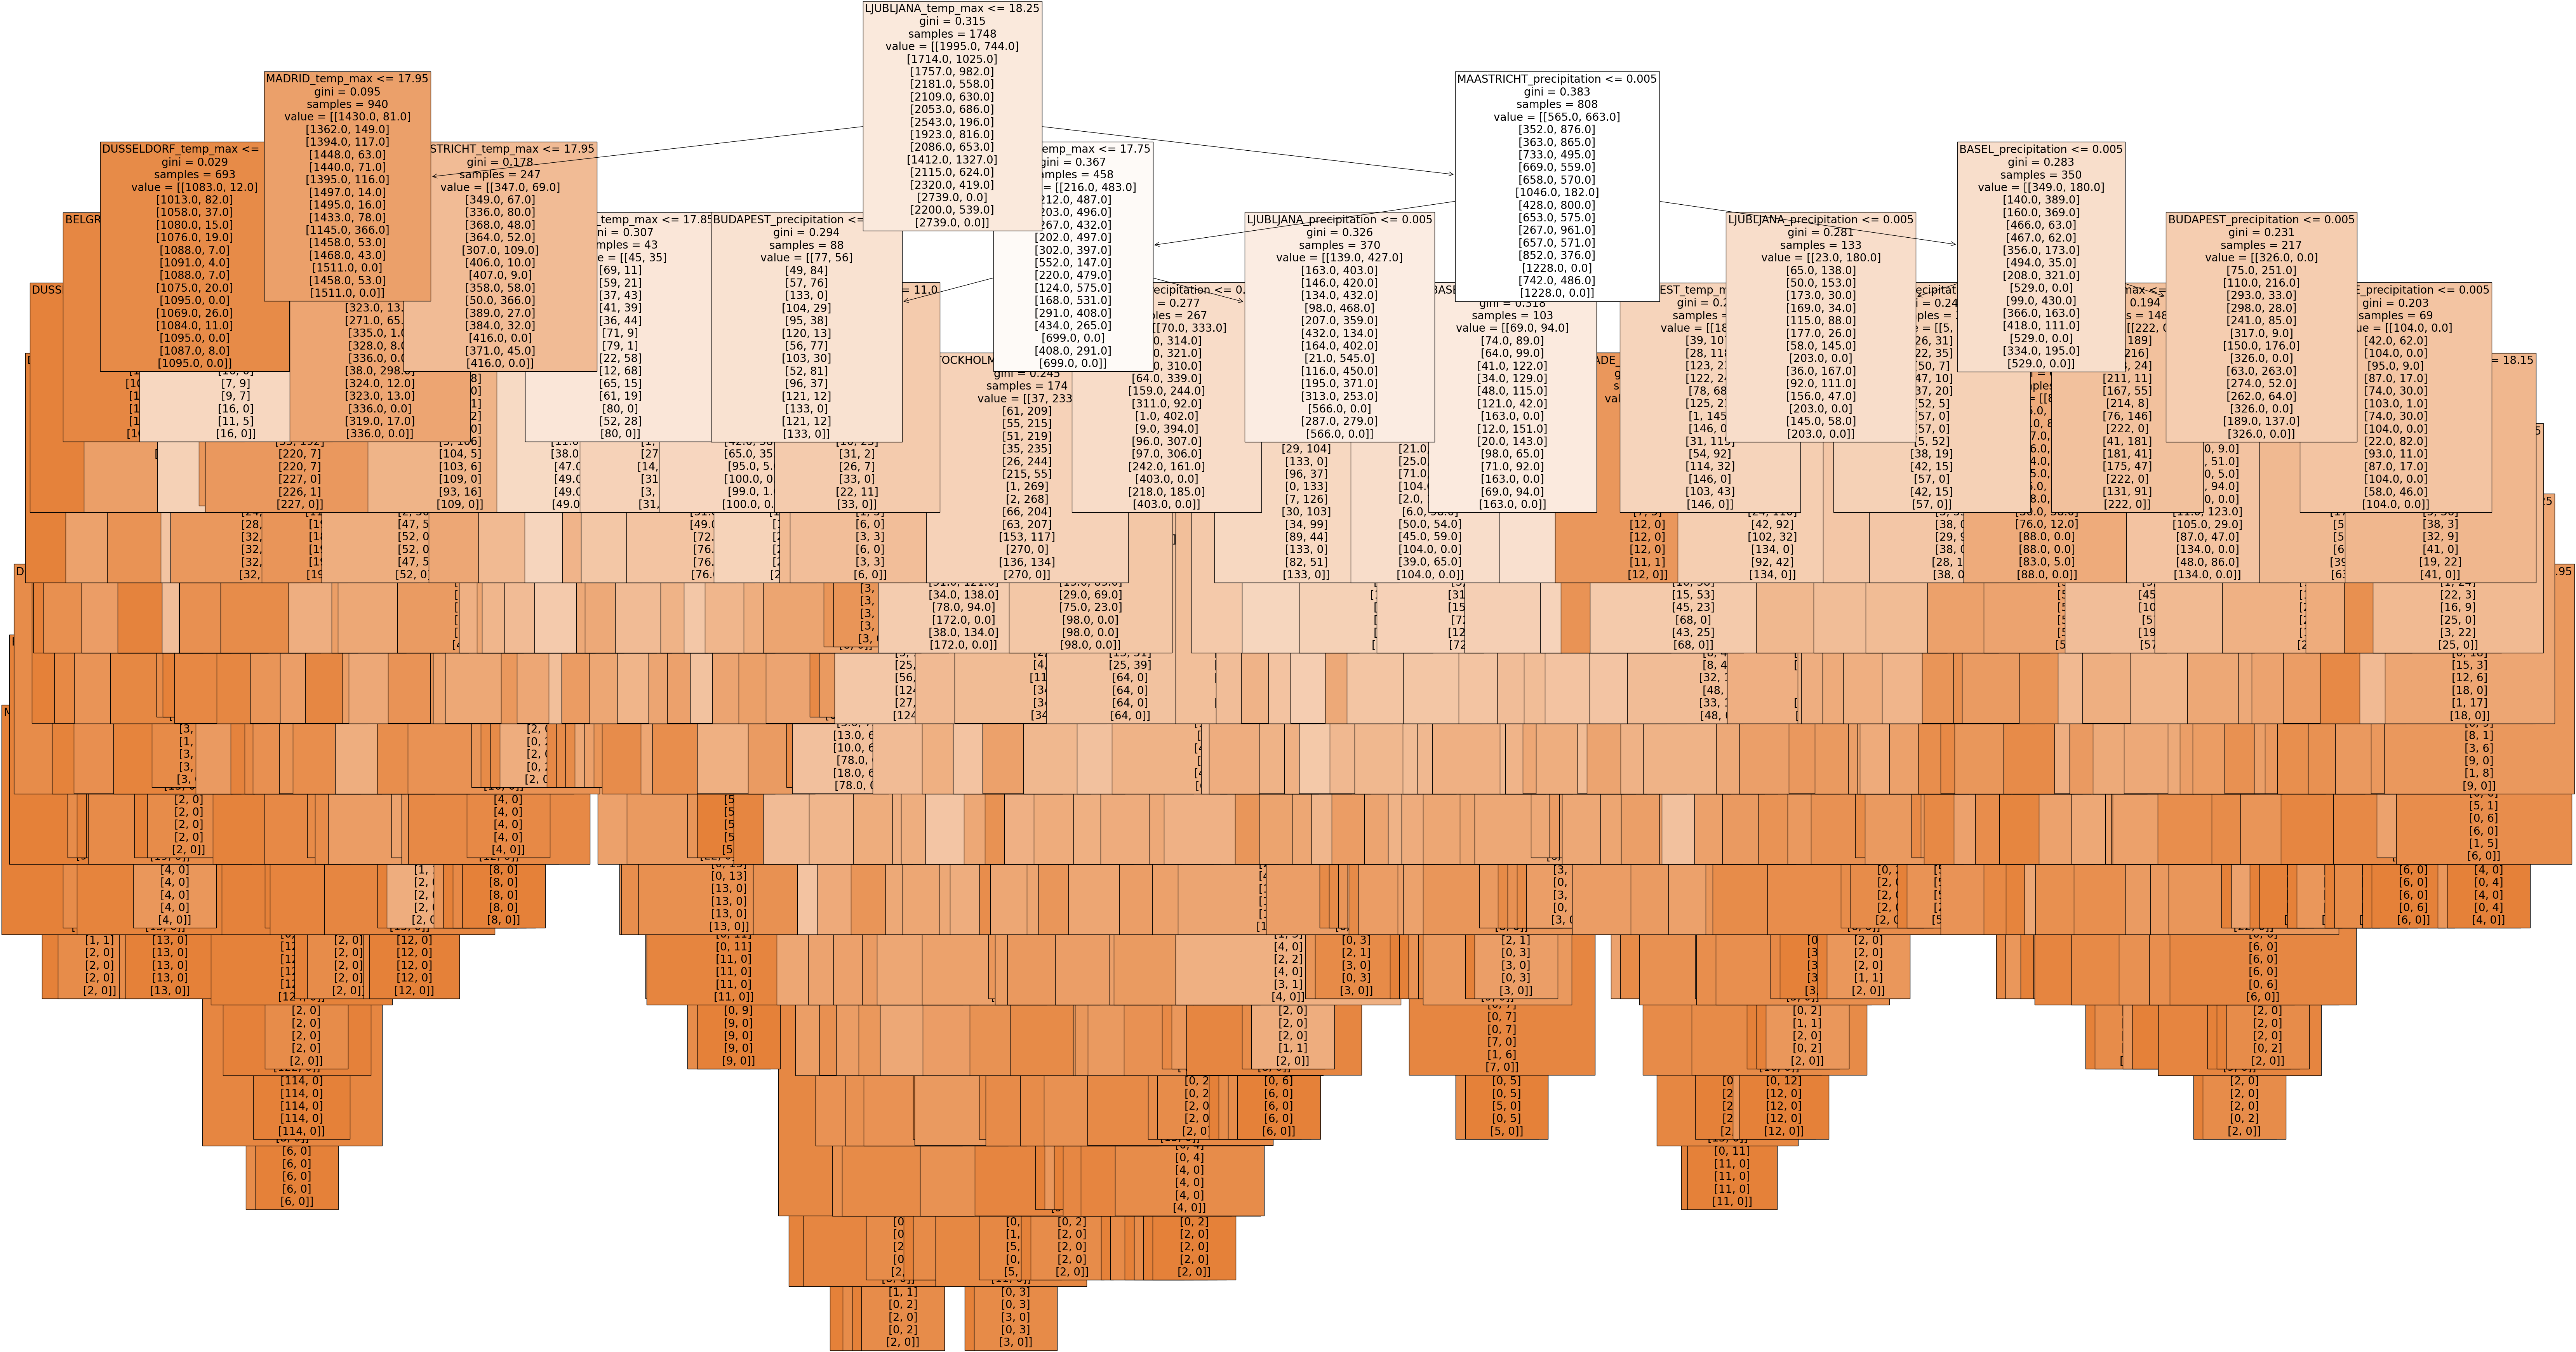

In [194]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [199]:
fig.savefig(os.path.join(path, 'Visualizations','optimized_random_forest_2010s.png'), bbox_inches='tight')

## 7. Uncovering Feature Importances

In [204]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.13818088e-03, 1.94236800e-03, 1.40038292e-03, 1.72710966e-03,
       3.43250925e-02, 3.67688195e-03, 8.38436533e-03, 1.29536712e-03,
       8.06902538e-02, 2.16743450e-03, 1.72964161e-03, 1.81078642e-03,
       1.49291358e-03, 3.05296914e-02, 1.56123140e-03, 4.07602720e-03,
       1.45437137e-03, 9.01482143e-03, 7.18984777e-05, 0.00000000e+00,
       0.00000000e+00, 5.80170438e-04, 2.97370166e-02, 5.21930949e-04,
       7.53022600e-03, 1.53123583e-03, 1.83208000e-02, 9.35304419e-04,
       1.23468471e-03, 1.56959130e-03, 1.81077400e-03, 2.15069617e-02,
       1.99941117e-03, 1.57008771e-03, 1.41690813e-03, 4.54573539e-02,
       7.82456393e-04, 1.28633433e-03, 1.34562649e-03, 1.61284768e-03,
       3.68437015e-02, 1.99180865e-03, 1.74810911e-03, 1.35429131e-03,
       1.23138630e-01, 1.34344304e-03, 3.01705919e-03, 1.60715586e-03,
       2.52815341e-03, 1.51353488e-02, 2.96014303e-03, 2.36099244e-03,
       1.59230565e-03, 9.80720008e-03, 7.48215813e-04, 1.42331497e-03,
      

In [208]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.13818088e-03, 1.94236800e-03, 1.40038292e-03, 1.72710966e-03,
         3.43250925e-02, 3.67688195e-03, 8.38436533e-03, 1.29536712e-03,
         8.06902538e-02],
        [2.16743450e-03, 1.72964161e-03, 1.81078642e-03, 1.49291358e-03,
         3.05296914e-02, 1.56123140e-03, 4.07602720e-03, 1.45437137e-03,
         9.01482143e-03],
        [7.18984777e-05, 0.00000000e+00, 0.00000000e+00, 5.80170438e-04,
         2.97370166e-02, 5.21930949e-04, 7.53022600e-03, 1.53123583e-03,
         1.83208000e-02],
        [9.35304419e-04, 1.23468471e-03, 1.56959130e-03, 1.81077400e-03,
         2.15069617e-02, 1.99941117e-03, 1.57008771e-03, 1.41690813e-03,
         4.54573539e-02],
        [7.82456393e-04, 1.28633433e-03, 1.34562649e-03, 1.61284768e-03,
         3.68437015e-02, 1.99180865e-03, 1.74810911e-03, 1.35429131e-03,
         1.23138630e-01],
        [1.34344304e-03, 3.01705919e-03, 1.60715586e-03, 2.52815341e-03,
         1.51353488e-02, 2.96014303e-03, 2.36099244e-03, 1.59230565

In [212]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.13458   , 0.05383692, 0.05829328, 0.07750108, 0.17010381,
       0.0403518 , 0.02368326, 0.07010524, 0.1399603 , 0.07480296,
       0.06826295, 0.04163152, 0.01268228, 0.03236956, 0.00183505])

In [215]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [218]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [221]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [224]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

DUSSELDORF    0.170104
OSLO          0.139960
BASEL         0.134580
BELGRADE      0.077501
KASSEL        0.074803
BUDAPEST      0.070105
MAASTRICHT    0.068263
MUNCHENB      0.058293
DEBILT        0.053837
SONNBLICK     0.041632
LJUBLJANA     0.040352
HEATHROW      0.032370
MADRID        0.023683
VALENTIA      0.012682
STOCKHOLM     0.001835
dtype: float64

In [228]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['BASEL', 'DEBILT', 'MUNCHENB', 'BELGRADE', 'DUSSELDORF', 'LJUBLJANA', 'MADRID', 'BUDAPEST', 'OSLO', 'KASSEL', 'MAASTRICHT', 'SONNBLICK', 'VALENTIA', 'HEATHROW', 'STOCKHOLM']


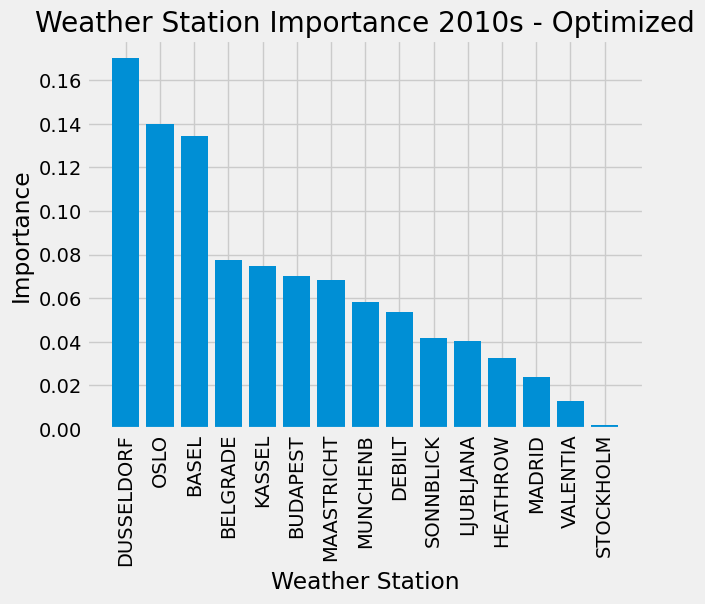

In [235]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path, 'Visualizations','optimized_featureimportance_2010s.png'), bbox_inches='tight')

plt.show()

### Random Forest for Dusseldorf Data (all years)

In [241]:
# Filter weather dataset to only include Debilt
df_dusseldorf = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]


df_dusseldorf

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                       6             0.92           1.0260   
1                       7             0.86           1.0254   
2                       5             0.90           1.0287   
3                       0             0.75           1.0281   
4                       2             0.64           1.0269   
...                   ...              ...              ...   
22945                   8             0.52           1.0204   
22946                   8             0.51           1.0221   
22947                   8             0.46           1.0186   
22948                   5             0.66           1.0186   
22949                   8             0.82           1.0188   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                         0.53                  0.00              1.4   
1                         0.46                  0.00              0.9   
2                         0.63                  0.00              2.3   
3                         1.16                  0.00              8.7   
4                         1.10                  0.00              7.8   
...                        ...                   ...              ...   
22945                     1.89                  0.12              5.3   
22946                     1.89                  0.12              3.9   
22947                     1.89                  0.12              8.1   
22948                     1.89                  0.12              3.1   
22949                     1.89                  0.12              0.0   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0                   7.6              4.4             10.8  
1                   9.8              7.4             12.2  
2                   8.6              6.4             10.8  
3                  10.3              4.5             16.1  
4                  12.1              8.2             16.0  
...                 ...              ...              ...  
22945              20.0             16.2             23.9  
22946              19.1             14.7             23.5  
22947              19.0             15.4             22.6  
22948              15.7             13.1             18.3  
22949              14.1             12.1             16.1  

[22950 rows x 9 columns]

In [244]:
# Filter pleasant dataset to only include Madrid
pleasant_duss = plweather[plweather.columns[plweather.columns.astype(str).str.startswith('DEBILT')]]

pleasant_duss

DEBILT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
22945                        0
22946                        0
22947                        0
22948                        0
22949                        0

[22950 rows x 1 columns]

In [248]:
# Create matrices
y2 = pleasant_duss.max(axis=1)

y2.shape

(22950,)

In [251]:
# Ensure y has the correct shape
y2 = y2.to_numpy().reshape(-1)


y2.shape

(22950,)

In [256]:
# Create X matrix
X2 = df_dusseldorf.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [259]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [262]:
X.shape

(22950, 9)

In [264]:
y.shape

(22950,)

In [267]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [270]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [273]:
X_train

array([[ 4.    ,  0.48  ,  1.0139, ..., 24.8   , 19.    , 30.5   ],
       [ 5.    ,  0.7   ,  1.0192, ...,  5.8   ,  2.7   ,  8.8   ],
       [ 8.    ,  0.91  ,  1.0006, ...,  2.1   ,  0.6   ,  3.6   ],
       ...,
       [ 6.    ,  0.53  ,  1.0147, ..., 18.1   , 13.2   , 23.    ],
       [ 0.    ,  0.45  ,  1.0204, ..., 17.5   , 10.2   , 24.8   ],
       [ 6.    ,  0.74  ,  1.0155, ..., 13.4   ,  9.2   , 17.5   ]])

In [275]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [277]:
X_test

array([[ 2.    ,  0.42  ,  1.0114, ..., 24.8   , 18.3   , 31.2   ],
       [ 6.    ,  0.78  ,  1.0086, ..., 12.3   ,  7.6   , 17.    ],
       [ 0.    ,  0.38  ,  1.0129, ..., 27.2   , 20.9   , 33.5   ],
       ...,
       [ 8.    ,  0.91  ,  1.0057, ..., 12.5   , 10.6   , 14.4   ],
       [ 0.    ,  0.48  ,  1.0165, ..., 14.4   ,  9.4   , 19.4   ],
       [ 8.    ,  0.64  ,  1.0178, ..., 20.6   , 17.6   , 23.5   ]])

In [279]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Hyperparameter Optimization-Grid search

In [286]:
# Create a RF classifier

clf = RandomForestClassifier()

In [289]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [292]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 3.9136805216471355 minutes


In [297]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.8230888252078202


In [300]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [303]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [307]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 3.236620306968689 minutes


In [313]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 150}
Best RANDOM search score is: 0.8232050883290132


#### Running Random Forest with Optimized Search Parameters

In [325]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=7, max_features=2, min_samples_leaf=1, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, n_estimators=150)

In [328]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  0.8203206692227257


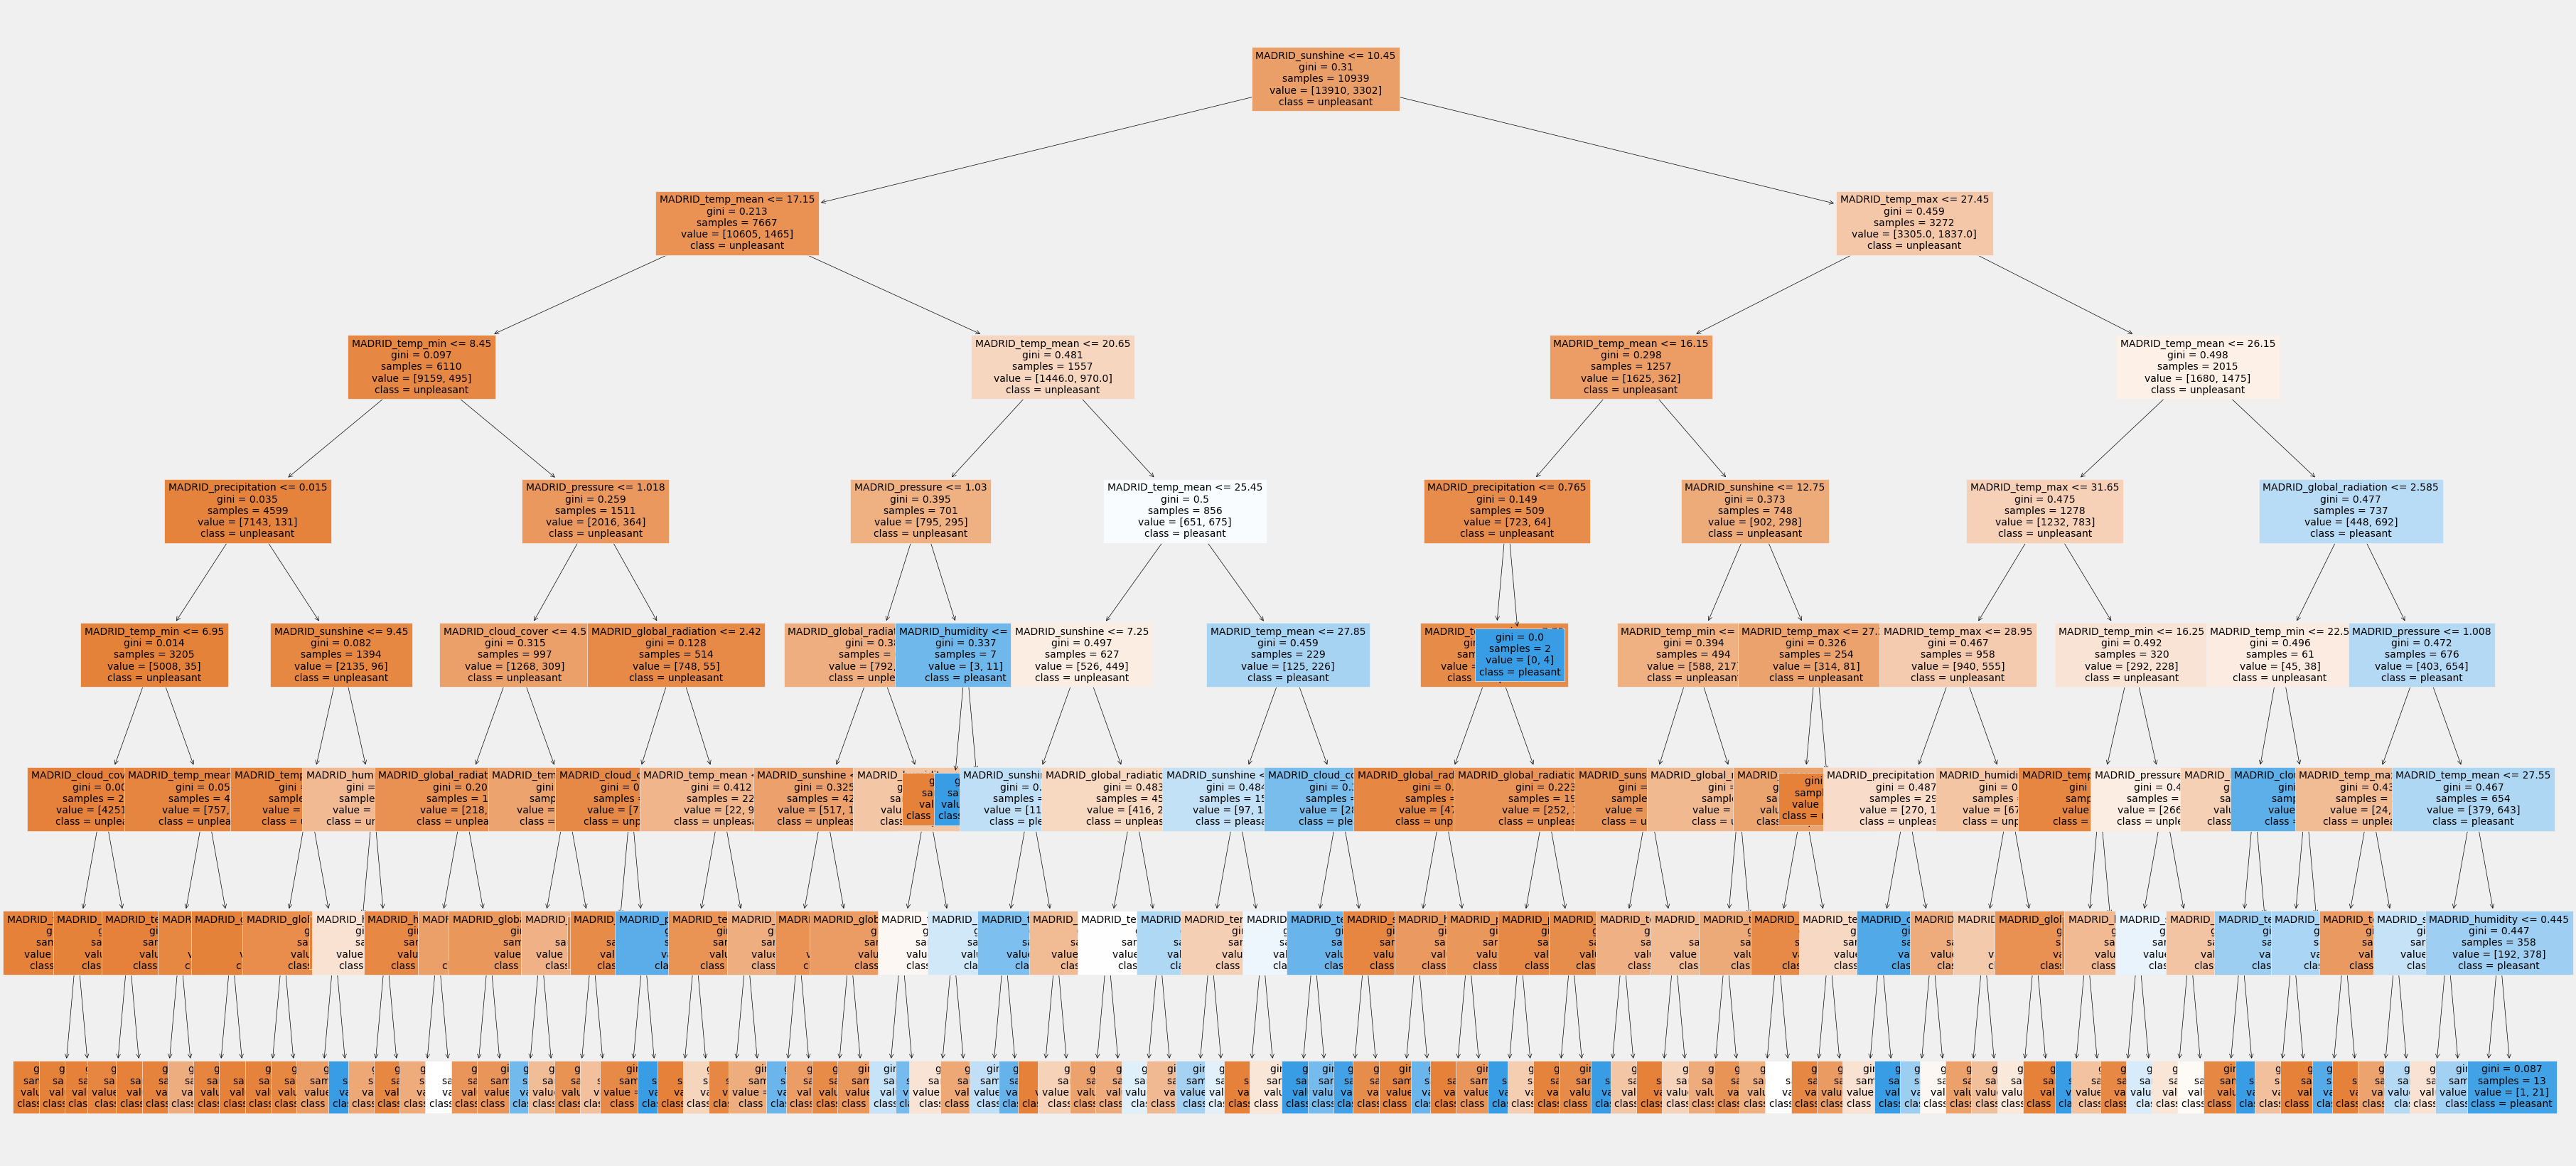

In [334]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_dusseldorf.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [338]:
fig.savefig(os.path.join(path,'Visualizations', 'optimized_random_forest_dusseldorf.png'),bbox_inches='tight')

#### Uncovering Feature Importances

In [343]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.01672799, 0.04407631, 0.05292575, 0.11017998, 0.02193186,
       0.06693347, 0.23569657, 0.24988678, 0.20164129])

In [346]:
# Retrieve feature importances from the trained model
duss_importance = clf3.feature_importances_
print("Feature Importances:", duss_importance)
print(duss_importance.shape)

Feature Importances: [0.01672799 0.04407631 0.05292575 0.11017998 0.02193186 0.06693347
 0.23569657 0.24988678 0.20164129]
(9,)


In [349]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [354]:
# Create a dataframe to associate observation measurements with their importances
duss_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': duss_importance
})

In [357]:
# Sort by importance for chart readability
dus_importance = duss_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(duss_importance)

Feature Importance:
        Measurement  Importance
0       cloud_cover    0.016728
1          humidity    0.044076
2          pressure    0.052926
3  global_radiation    0.110180
4     precipitation    0.021932
5          sunshine    0.066933
6         temp_mean    0.235697
7          temp_min    0.249887
8          temp_max    0.201641


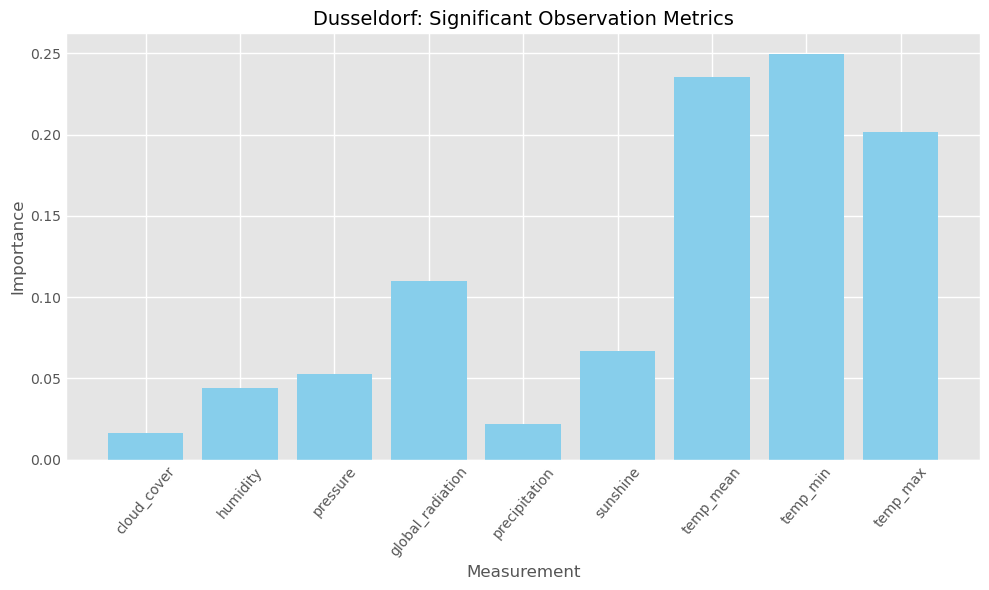

In [362]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(duss_importance['Measurement'], duss_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Dusseldorf: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()